En este script, se utilizarán las librerías *pandas* y *matplotlib* para leer unos ficheros de extensión *xvg* y graficarlos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creamos una función que lea dos ficheros y los grafique uno al lado del otro
def graficar_doble(ruta1, ruta2, x_label, y_label, salida, share_y = False, ancho_linea = 0.5):
    try:
        # Leemos los ficheros
        fichero1 = pd.read_csv(ruta1, sep="\s+", names = [x_label, y_label])
        fichero2 = pd.read_csv(ruta2, sep="\s+", names = [x_label, y_label])
        
        # Creamos una figura con dos subgráficos
        fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey = share_y)
        
        # Graficamos el primer archivo
        axes[0].plot(fichero1[x_label], fichero1[y_label], linewidth = ancho_linea)
        axes[0].set_xlabel(x_label)
        axes[0].set_ylabel(y_label)
        axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5) # Parámetros para la cuadrícula
        axes[0].set_title("298 K", fontsize=10)
        
        # Graficamos el segundo archivo
        axes[1].plot(fichero2[x_label], fichero2[y_label], linewidth = ancho_linea)
        axes[1].set_xlabel(x_label)
        axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5) # Parámetros para la cuadrícula
        axes[1].set_title("400 K", fontsize=10)
        
        # Guardamos el gráfico
        plt.savefig(salida, dpi=300)  # dpi es la resolución de la imagen
        plt.show() # Muestra el gráfico
        
    except FileNotFoundError:
        print("Error: No se encontró el archivo. Verifica la ruta.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

In [3]:
# Creamos otra función que lea los ficheros y realice histogramas
def histograma_doble(ruta1, ruta2, label1, label2, salida):
    try:
        # Leemos los ficheros
        fichero1 = pd.read_csv(ruta1, sep="\s+", names = [label1, label2])
        fichero2 = pd.read_csv(ruta2, sep="\s+", names = [label1, label2])
        
        #Guardamos la variable de la que queremos hacer el histograma
        datos1 = fichero1[label2]
        datos2 = fichero2[label2]
        
        # Creamos una figura con dos subgráficos
        fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
        
        # Hacemos los histogramas
        axes[0].hist(datos1, bins = 30, color = 'purple', edgecolor='black')
        axes[0].set_xlabel(label2)
        axes[0].set_ylabel('Frecuencia')
        axes[0].set_title("298 K", fontsize=10)
        
        axes[1].hist(datos2, bins = 30, color = 'purple', edgecolor='black')
        axes[1].set_xlabel(label2)
        axes[1].set_title("400 K", fontsize=10)
        
        # Guardamos el gráfico
        plt.savefig(salida, dpi=300)  # dpi es la resolución de la imagen
        plt.show() # Muestra el gráfico
        
    except FileNotFoundError:
        print("Error: No se encontró el archivo. Verifica la ruta.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

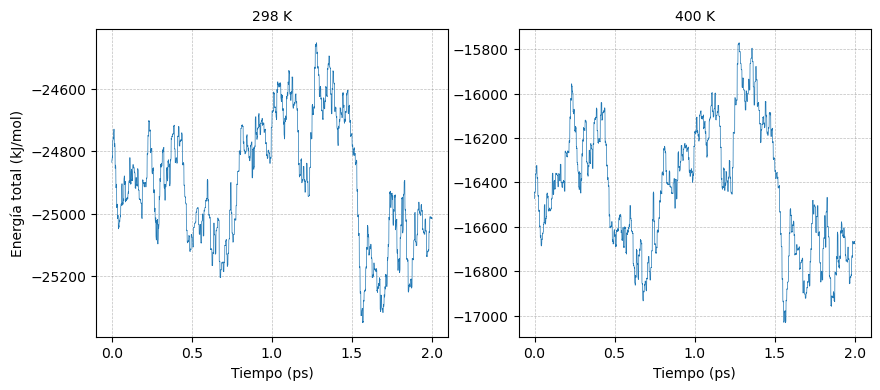

In [21]:
# Graficamos la energía total a 298 K vs a 400 K
graficar_doble('./298/4-analysis/totalEnergy.xvg', './400/4-analysis/totalEnergy.xvg', 'Tiempo (ps)', 'Energía total (kJ/mol)', 'energiaTotal.jpg')

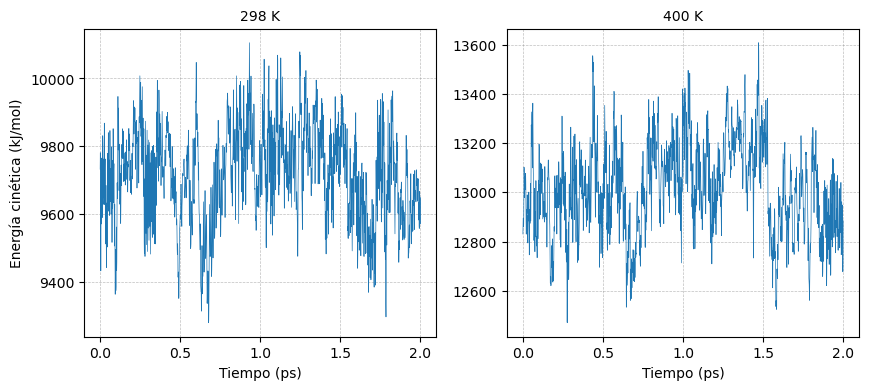

In [22]:
# Graficamos la energía cinética a 298 K vs a 400 K
graficar_doble('./298/4-analysis/kineticEnergy.xvg', './400/4-analysis/kineticEnergy.xvg', 'Tiempo (ps)', 'Energía cinética (kJ/mol)', 'energiaCinetica.jpg')

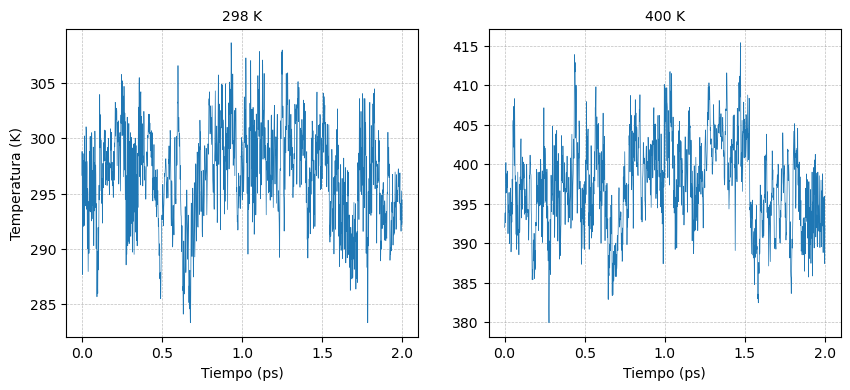

In [23]:
# Graficamos la evolución de la temperatura de las simulaciones de 298 K vs 400 K
graficar_doble('./298/4-analysis/temp.xvg', './400/4-analysis/temp.xvg', 'Tiempo (ps)', 'Temperatura (K)', 'temp.jpg')

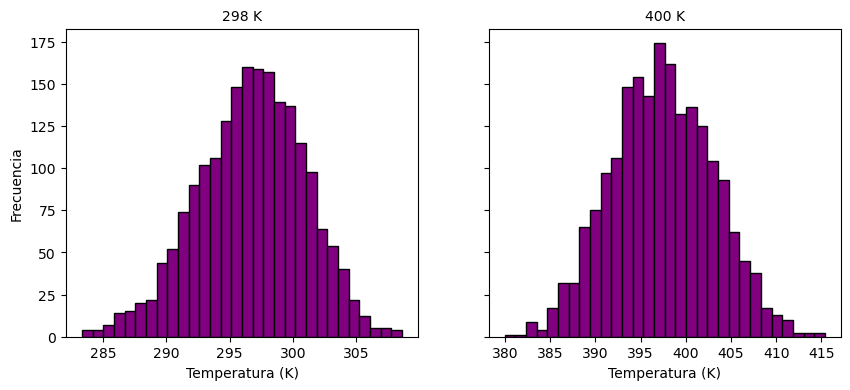

In [24]:
# Realizamos histogramas de la temperatura
histograma_doble('./298/4-analysis/temp.xvg', './400/4-analysis/temp.xvg', 'Tiempo (ps)', 'Temperatura (K)', 'histTemp.jpg')

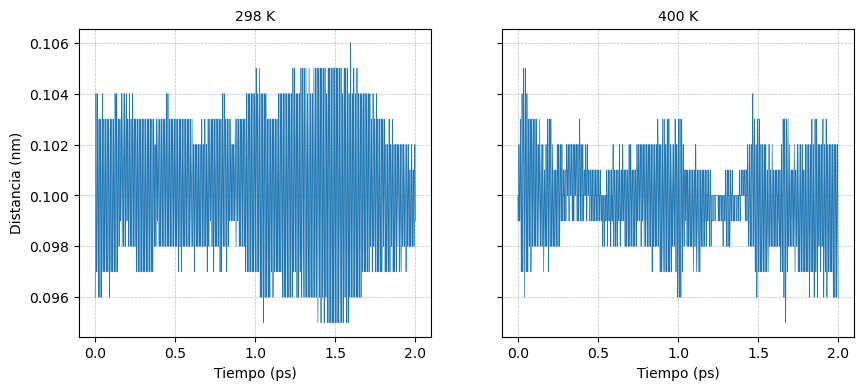

In [25]:
# Graficamos la distancia de enlace del grupo NH de la Alanina-2 a 298 K vs 400 K
graficar_doble('./298/4-analysis/distNH.xvg', './400/4-analysis/distNH.xvg', 'Tiempo (ps)', 'Distancia (nm)', 'distNH.jpg', True)

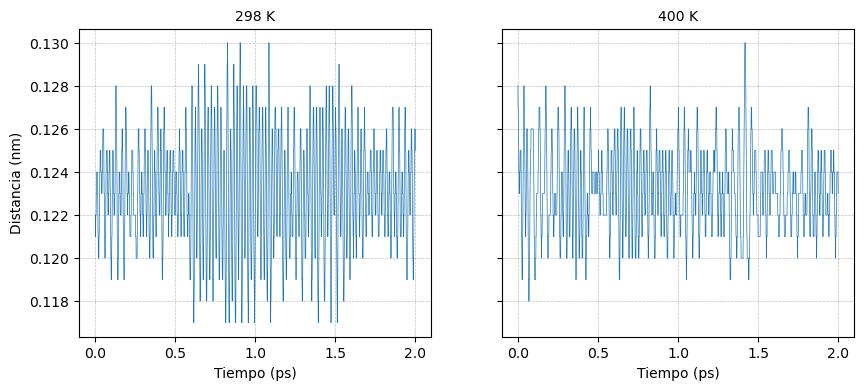

In [26]:
# Graficamos la distancia de enlace del grupo CO de la Glutamina-3 a 298 K vs 400 K
graficar_doble('./298/4-analysis/distCO.xvg', './400/4-analysis/distCO.xvg', 'Tiempo (ps)', 'Distancia (nm)', 'distCO.jpg', True)

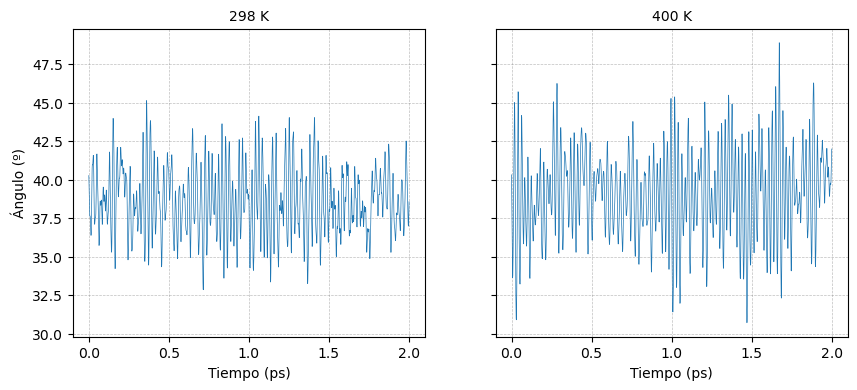

In [30]:
# Graficamos el ángulo de enlace de CA-N-H de la Alanina-2 a 298 K vs 400 K
graficar_doble('./298/4-analysis/angaverCANH.xvg', './400/4-analysis/angaverCANH.xvg', 'Tiempo (ps)', 'Ángulo (º)', 'angCANH.jpg', True)

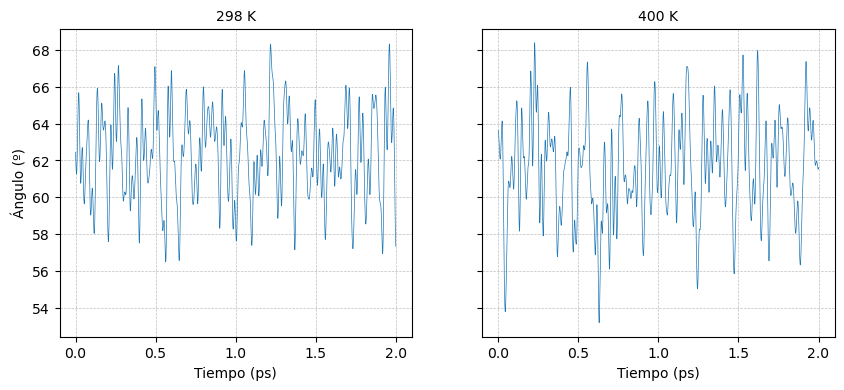

In [31]:
# Graficamos el ángulo de enlace de C-O-CA de la Glutamina-3 a 298 K vs 400 K
graficar_doble('./298/4-analysis/angaverCOCA.xvg', './400/4-analysis/angaverCOCA.xvg', 'Tiempo (ps)', 'Ángulo (º)', 'angCOCA.jpg', True)

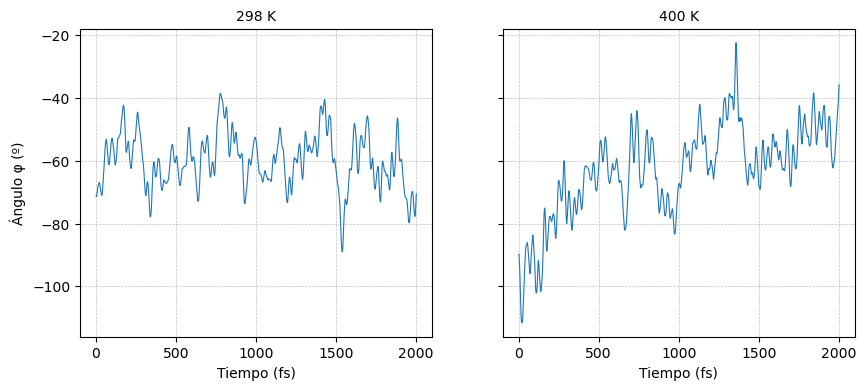

In [6]:
# Graficamos la evolución del ángulo phi de la Alanina-2 a 298 K y 400 K
graficar_doble('./298/4-analysis/phi-ala-2.dat', './400/4-analysis/phi-ala-2.dat', 'Tiempo (fs)', 'Ángulo φ (º)', 'phiAla.jpg', True, 0.8)

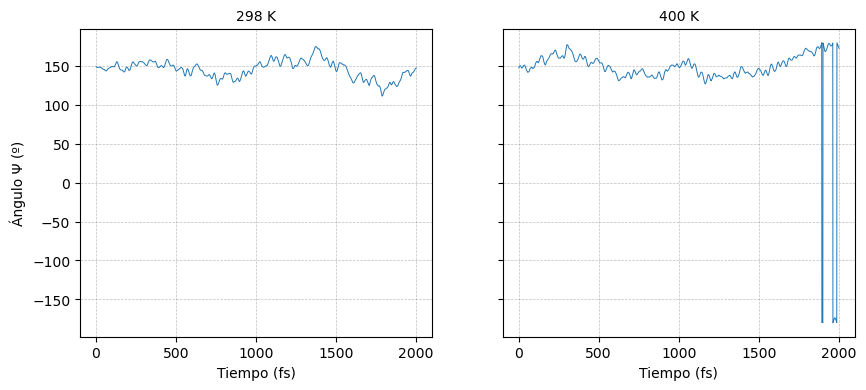

In [8]:
# Graficamos la evolución del ángulo psi de la Alanina-2 a 298 K y 400 K
graficar_doble('./298/4-analysis/psi-ala-2.dat', './400/4-analysis/psi-ala-2.dat','Tiempo (fs)', 'Ángulo Ψ (º)', 'psiAla.jpg', True, 0.7)

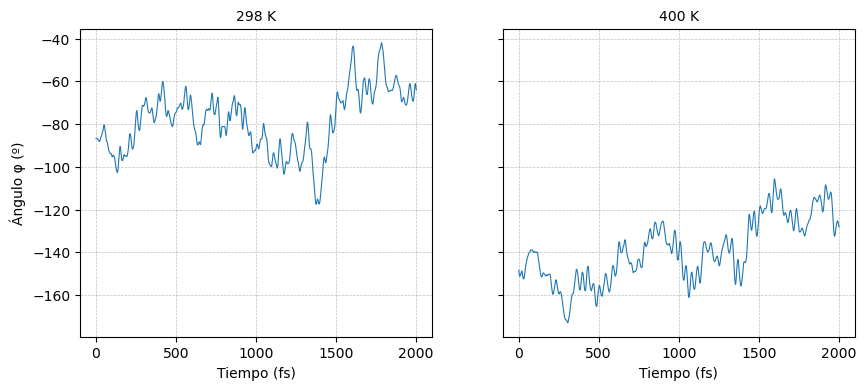

In [10]:
# Graficamos la evolución del ángulo phi de la Glutamina a 298 K y 400 K
graficar_doble('./298/4-analysis/phi-gln-3.dat', './400/4-analysis/phi-gln-3.dat', 'Tiempo (fs)', 'Ángulo φ (º)', 'phiGln.jpg', True, 0.8)

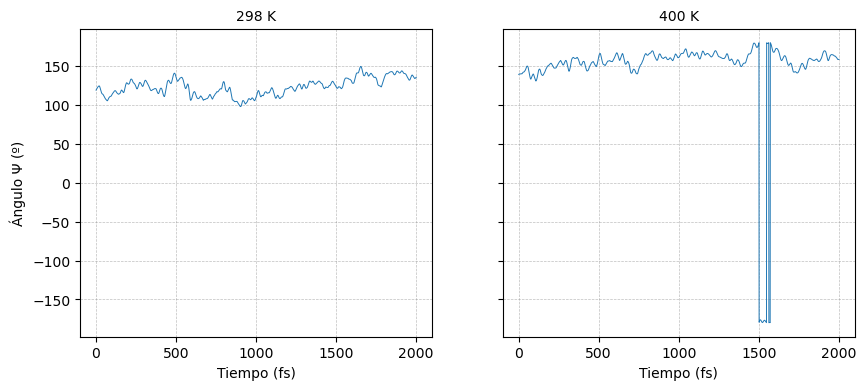

In [11]:
# Graficamos la evolución del ángulo psi de la Glutamina a 298 K y 400 K
graficar_doble('./298/4-analysis/psi-gln-3.dat', './400/4-analysis/psi-gln-3.dat', 'Tiempo (fs)', 'Ángulo Ψ (º)', 'psiGln.jpg', True, 0.7)

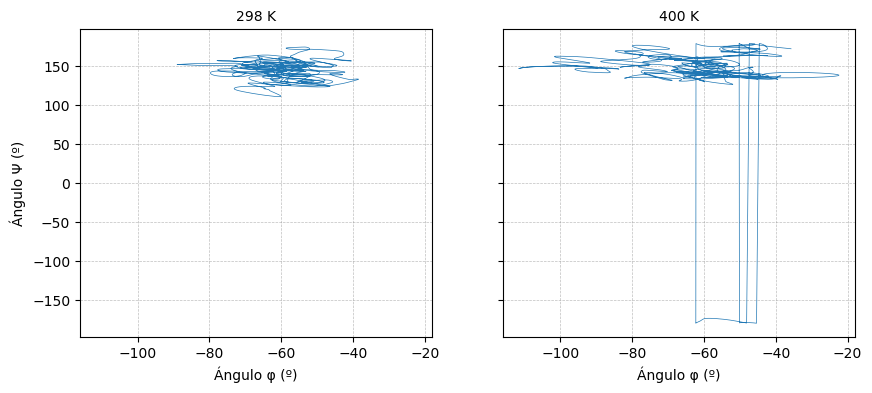

In [36]:
# Graficamos el ángulo phi frente al psi de Ala-2 a 298 K y 400 K
graficar_doble('./298/4-analysis/ala-2.dat', './400/4-analysis/ala-2.dat', 'Ángulo φ (º)', 'Ángulo Ψ (º)', 'dihedralAla.jpg', True)

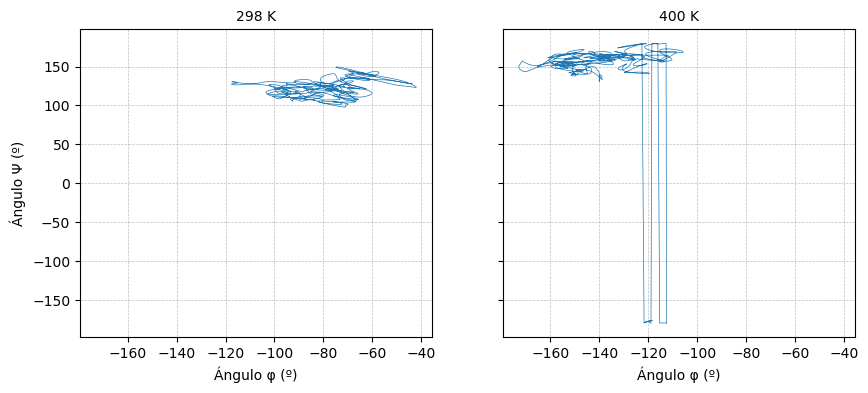

In [37]:
# Graficamos el ángulo phi frente al psi de Gln-3 a 298 K y 400 K
graficar_doble('./298/4-analysis/gln-3.dat', './400/4-analysis/gln-3.dat', 'Ángulo φ (º)', 'Ángulo Ψ (º)', 'dihedralGln.jpg', True)

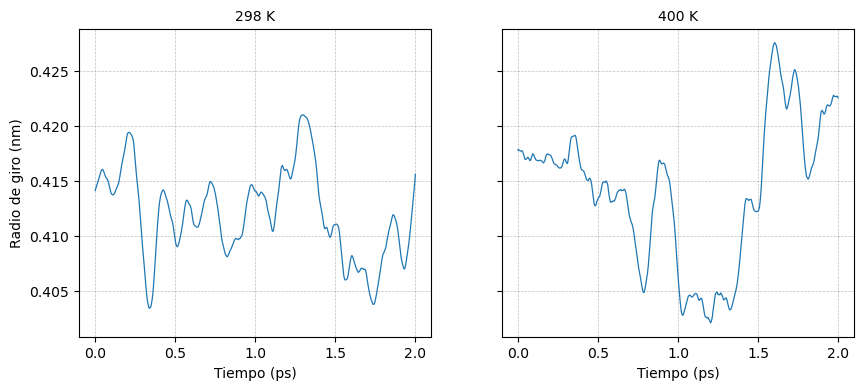

In [57]:
# Graficamos el radio de giro a 298 K y 400 K
graficar_doble('./298/4-analysis/gyrateRed.xvg', './400/4-analysis/gyrateRed.xvg', 'Tiempo (ps)', 'Radio de giro (nm)', 'gyrate.jpg', True, 0.9)

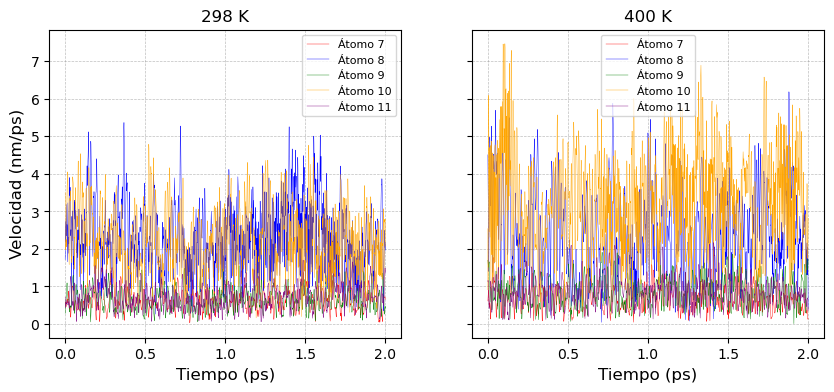

In [53]:
# Graficamos las velocidades de 5 átomos a 298 K y 400 K
# Como quiero incluir los 5 en la misma gráfica no usaré la función graficar_doble

# Cargamos los datos de los archivos
fichero1 = pd.read_csv("./298/4-analysis/veloc.xvg", sep="\s+")
fichero2 = pd.read_csv("./400/4-analysis/veloc.xvg", sep="\s+")

# Definimos las columnas para el eje x (tiempo) y para el eje Y (velocidades de los átomos)
x1 = fichero1.iloc[:, 0]  # Tiempo en 298 K
x2 = fichero2.iloc[:, 0]  # Tiempo en 400 K

# Velocidades de los átomos (columnas específicas para ambos ficheros)
y1_1, y2_1, y3_1, y4_1, y5_1 = fichero1.iloc[:, 28], fichero1.iloc[:, 32], fichero1.iloc[:, 36], fichero1.iloc[:, 40], fichero1.iloc[:, 44]
y1_2, y2_2, y3_2, y4_2, y5_2 = fichero2.iloc[:, 28], fichero2.iloc[:, 32], fichero2.iloc[:, 36], fichero2.iloc[:, 40], fichero2.iloc[:, 44]

# Creamos la figura y los subgráficos (1 fila y 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Graficamos los datos para 298 K (primer subgráfico, a la izquierda)
axes[0].plot(x1, y1_1, label="Átomo 7", color="red", linewidth=0.3)
axes[0].plot(x1, y2_1, label="Átomo 8", color="blue", linewidth=0.3)
axes[0].plot(x1, y3_1, label="Átomo 9", color="green", linewidth=0.3)
axes[0].plot(x1, y4_1, label="Átomo 10", color="orange", linewidth=0.3)
axes[0].plot(x1, y5_1, label="Átomo 11", color="purple", linewidth=0.3)

# Personalizamos el gráfico de 298 K
axes[0].set_title("298 K", fontsize=12)
axes[0].set_xlabel("Tiempo (ps)", fontsize=12)
axes[0].set_ylabel("Velocidad (nm/ps)", fontsize=12)
axes[0].legend(fontsize=8)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficamos los datos para 400 K (segundo subgráfico, a la derecha)
axes[1].plot(x2, y1_2, label="Átomo 7", color="red", linewidth=0.3)
axes[1].plot(x2, y2_2, label="Átomo 8", color="blue", linewidth=0.3)
axes[1].plot(x2, y3_2, label="Átomo 9", color="green", linewidth=0.3)
axes[1].plot(x2, y4_2, label="Átomo 10", color="orange", linewidth=0.3)
axes[1].plot(x2, y5_2, label="Átomo 11", color="purple", linewidth=0.3)

# Personalizamos el gráfico de 400 K
axes[1].set_title("400 K", fontsize=12)
axes[1].set_xlabel("Tiempo (ps)", fontsize=12)
axes[1].legend(fontsize=8)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Guardamos y mostramos la figura
plt.savefig('veloc.jpg', dpi=300)
plt.show()

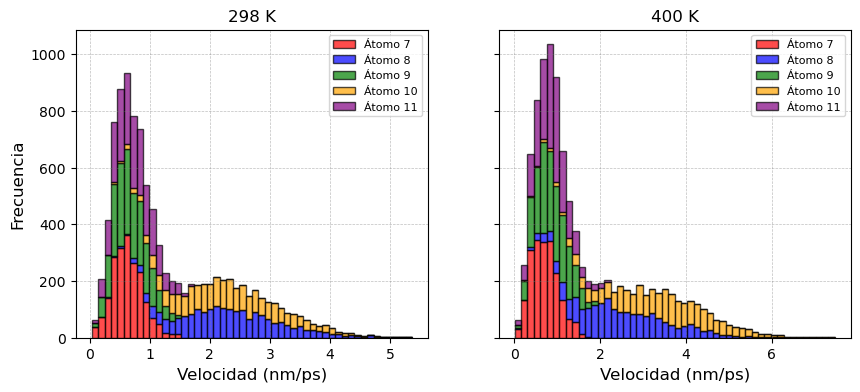

In [51]:
# Ahora hacemos histogramas

# Creamos la figura con dos subgráficos (uno a la izquierda y otro a la derecha)
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey = True)

# Graficamos los histogramas en el primer subgráfico (298 K)
axes[0].hist([y1_1, y2_1, y3_1, y4_1, y5_1], bins=50, color=['red', 'blue', 'green', 'orange', 'purple'], edgecolor='black', 
             label=["Átomo 7", "Átomo 8", "Átomo 9", "Átomo 10", "Átomo 11"], alpha=0.7, stacked=True)
axes[0].set_title("298 K", fontsize=12)
axes[0].set_xlabel("Velocidad (nm/ps)", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].legend(fontsize=8)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficamos los histogramas en el segundo subgráfico (400 K)
axes[1].hist([y1_2, y2_2, y3_2, y4_2, y5_2], bins=50, color=['red', 'blue', 'green', 'orange', 'purple'], edgecolor='black',
             label=["Átomo 7", "Átomo 8", "Átomo 9", "Átomo 10", "Átomo 11"], alpha=0.7, stacked=True)
axes[1].set_title("400 K", fontsize=12)
axes[1].set_xlabel("Velocidad (nm/ps)", fontsize=12)
axes[1].legend(fontsize=8)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Guardamos y mostramos los histogramas
plt.savefig('histVel.jpg', dpi=300)
plt.show()

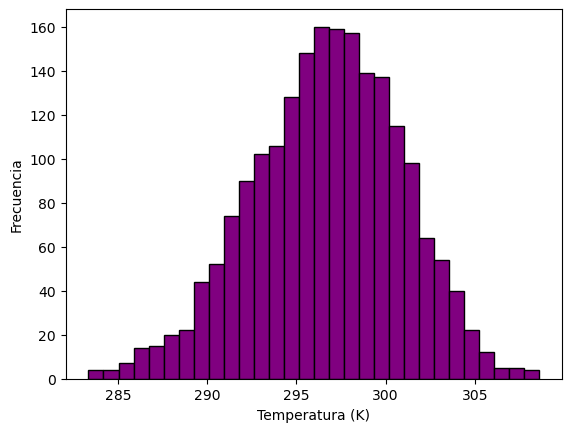

In [58]:
# Realizamos el histograma de temperatura de la simulación extra. No utilizaremos la función histograma_doble() porque solo es uno

# Leemos el fichero
fichero = pd.read_csv('./298/4-analysis/temp.xvg', sep="\s+", names = ['Tiempo (ps)', 'Temperatura (K)'])
        
#Guardamos la variable de la que queremos hacer el histograma
datos = fichero['Temperatura (K)']

# Hacemos el histograma
plt.hist(datos, bins = 30, color = 'purple', edgecolor='black')
plt.xlabel('Temperatura (K)')
plt.ylabel('Frecuencia')

# Guardamos el gráfico
plt.savefig('tempExtra.jpg', dpi=300)  # dpi es la resolución de la imagen
plt.show() # Muestra el gráfico

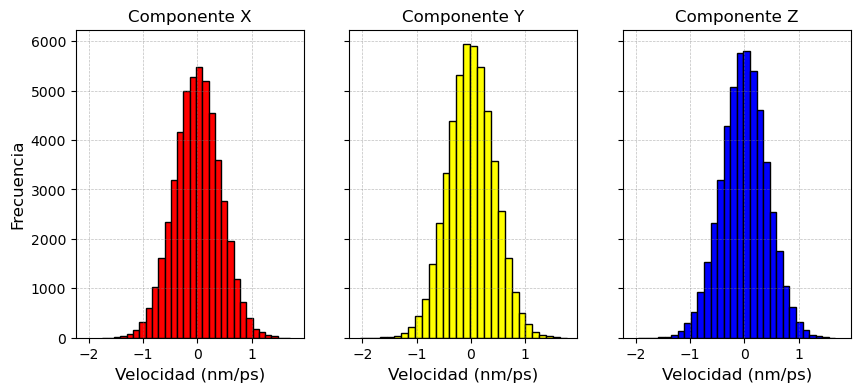

In [65]:
# Ahora hacemos histogramas de los tres componentes de la velocidad de un átomo seleccionado, que será el 7

# Leemos el fichero
fichero = pd.read_csv('./298/extra/4-analysis/veloc.xvg', sep="\s+")

# Creamos la figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex = True, sharey = True)

# Graficamos los histogramas en el primer subgráfico (componente X de la velocidad)
axes[0].hist(fichero.iloc[:, 25], bins = 30, color = 'red', edgecolor='black')
axes[0].set_title("Componente X", fontsize=12)
axes[0].set_xlabel("Velocidad (nm/ps)", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficamos los histogramas en el segundo subgráfico (componente Y de la velocidad)
axes[1].hist(fichero.iloc[:, 26], bins = 30, color = 'yellow', edgecolor='black')
axes[1].set_title("Componente Y", fontsize=12)
axes[1].set_xlabel("Velocidad (nm/ps)", fontsize=12)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficamos los histogramas en el tercer subgráfico (componente Z de la velocidad)
axes[2].hist(fichero.iloc[:, 27], bins = 30, color = 'blue', edgecolor='black')
axes[2].set_title("Componente Z", fontsize=12)
axes[2].set_xlabel("Velocidad (nm/ps)", fontsize=12)
axes[2].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Guardamos y mostramos los histogramas
plt.savefig('histVelExtra.jpg', dpi=300)
plt.show()

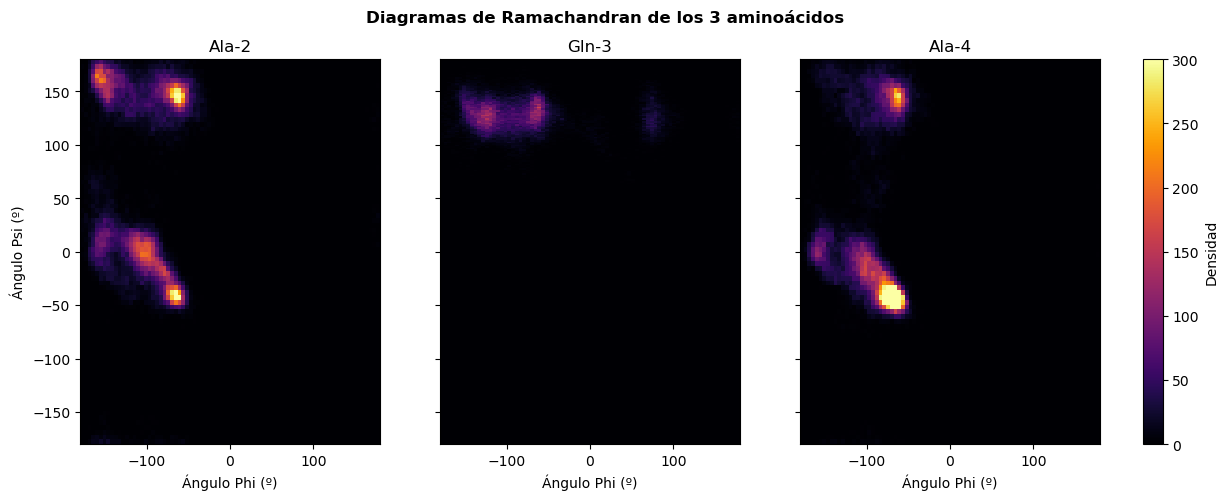

In [61]:
# Leemos los ficheros
fichero_ala2 = pd.read_csv('./298/extra/4-analysis/ala-2.dat', sep="\s+", names = ['Phi (º)', 'Psi (º)'])
fichero_gln3 = pd.read_csv('./298/extra/4-analysis/gln-3.dat', sep="\s+", names = ['Phi (º)', 'Psi (º)'])
fichero_ala4 = pd.read_csv('./298/extra/4-analysis/ala-4.dat', sep="\s+", names = ['Phi (º)', 'Psi (º)'])

# Creamos la figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)
fig.suptitle('Diagramas de Ramachandran de los 3 aminoácidos', fontweight='bold')  # Título general

# Diagrama de Ramachandran para Ala-2
cmap = 'inferno'  # Puedes cambiar este cmap a 'inferno', 'plasma', etc.
hist_ala2 = axes[0].hist2d(fichero_ala2['Phi (º)'], fichero_ala2['Psi (º)'], bins=80, cmap=cmap, vmin = 0, vmax=300)
axes[0].set_title('Ala-2')
axes[0].set_xlabel('Ángulo Phi (º)')
axes[0].set_ylabel('Ángulo Psi (º)')
axes[0].set_xlim([-180, 180])
axes[0].set_ylim([-180, 180])
axes[0].set_facecolor(plt.cm.inferno(0))  # Color de fondo uniforme

# Diagrama de Ramachandran para Gln-3
hist_gln3 = axes[1].hist2d(fichero_gln3['Phi (º)'], fichero_gln3['Psi (º)'], bins=80, cmap=cmap, vmin = 0, vmax=300)
axes[1].set_title('Gln-3')
axes[1].set_xlabel('Ángulo Phi (º)')
axes[1].set_xlim([-180, 180])
axes[1].set_ylim([-180, 180])
axes[1].set_facecolor(plt.cm.inferno(0))  # Color de fondo uniforme

# Diagrama de Ramachandran para Ala-4
hist_ala4 = axes[2].hist2d(fichero_ala4['Phi (º)'], fichero_ala4['Psi (º)'], bins=80, cmap=cmap, vmin = 0, vmax=300)
axes[2].set_title('Ala-4')
axes[2].set_xlabel('Ángulo Phi (º)')
axes[2].set_xlim([-180, 180])
axes[2].set_ylim([-180, 180])
axes[2].set_facecolor(plt.cm.inferno(0))  # Color de fondo uniforme

# Agregar barras de color
fig.colorbar(hist_ala2[3], ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Densidad')

# Guardamos y mostramos el gráfico
plt.savefig('ramachandran.jpg', dpi = 300)
plt.show()